In [110]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [3]:
train = pd.read_csv(r"C:\Users\AREHAN2\Documents\omscs\kgl\sf-crime\train.csv",parse_dates = ['Dates'])
test = pd.read_csv(r"C:\Users\AREHAN2\Documents\omscs\kgl\sf-crime\test.csv",parse_dates = ['Dates'])

In [5]:
print(train.shape)
print(test.shape)

(878049, 9)
(884262, 7)


In [6]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


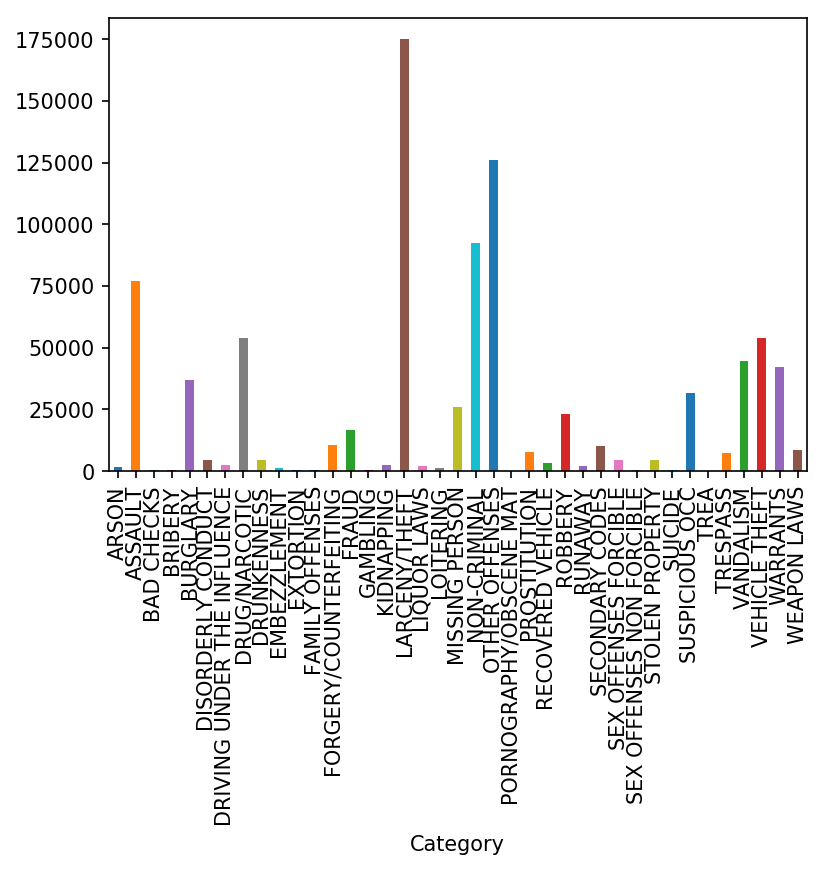

In [34]:
plt.rcParams['figure.dpi'] = 150
train[['Category', 'Descript']].groupby(["Category"])['Descript'].count().plot.bar()

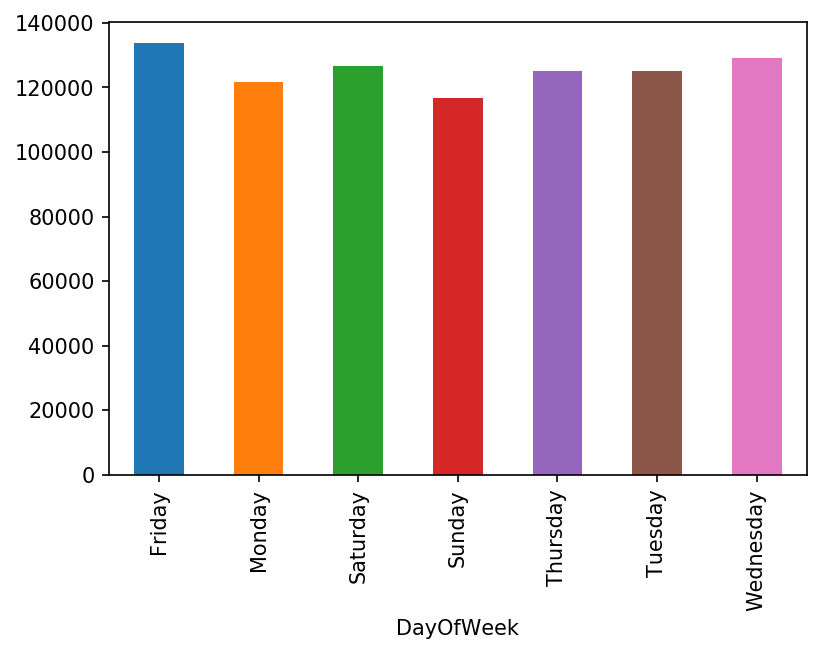

In [43]:
train[['Category', 'DayOfWeek', 'PdDistrict']].groupby(["DayOfWeek"])['PdDistrict'].count().plot.bar()

In [48]:
train['hour'] = train.Dates.dt.hour
train['month'] = train.Dates.dt.month
train['year'] = train.Dates.dt.year
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,month,year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015


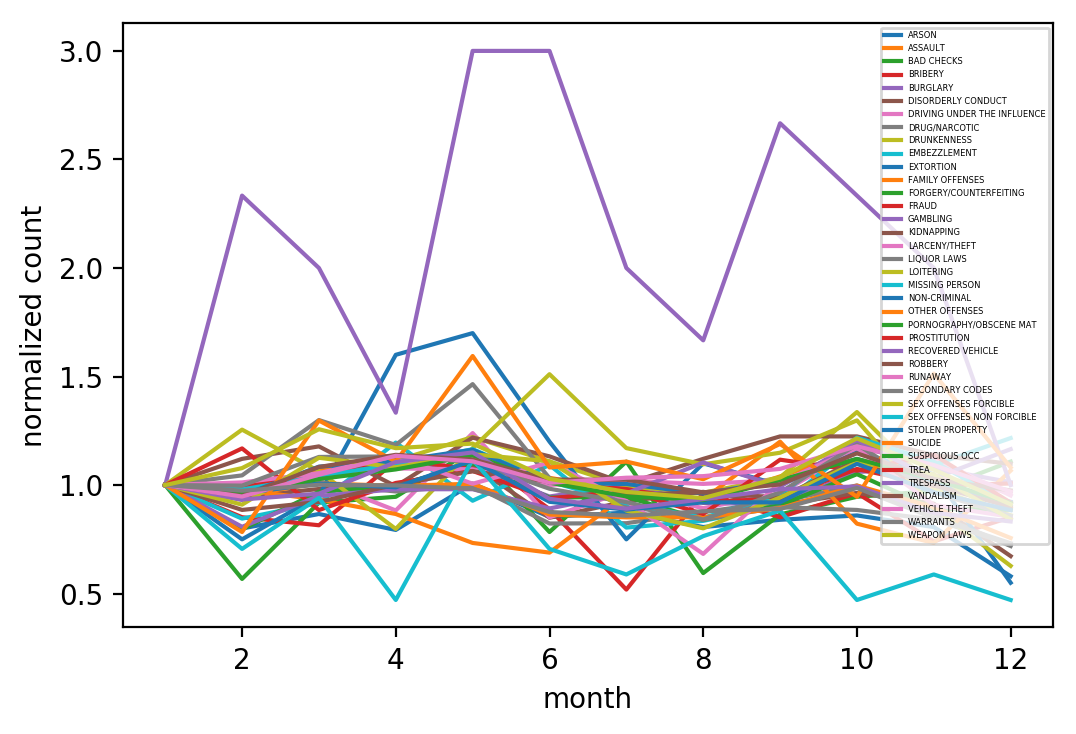

In [97]:
plt.rcParams['figure.dpi'] = 200

month_summary = train[['Category', 'month', 'PdDistrict']].groupby(['month', 'Category']).count().reset_index().pivot(values='PdDistrict', 
                                                                    index='month', columns='Category')
ax = (month_summary/month_summary.iloc[0]).plot()
ax.set_ylabel("normalized count")
ax.set_xlabel("month")
ax.legend(fontsize=3)

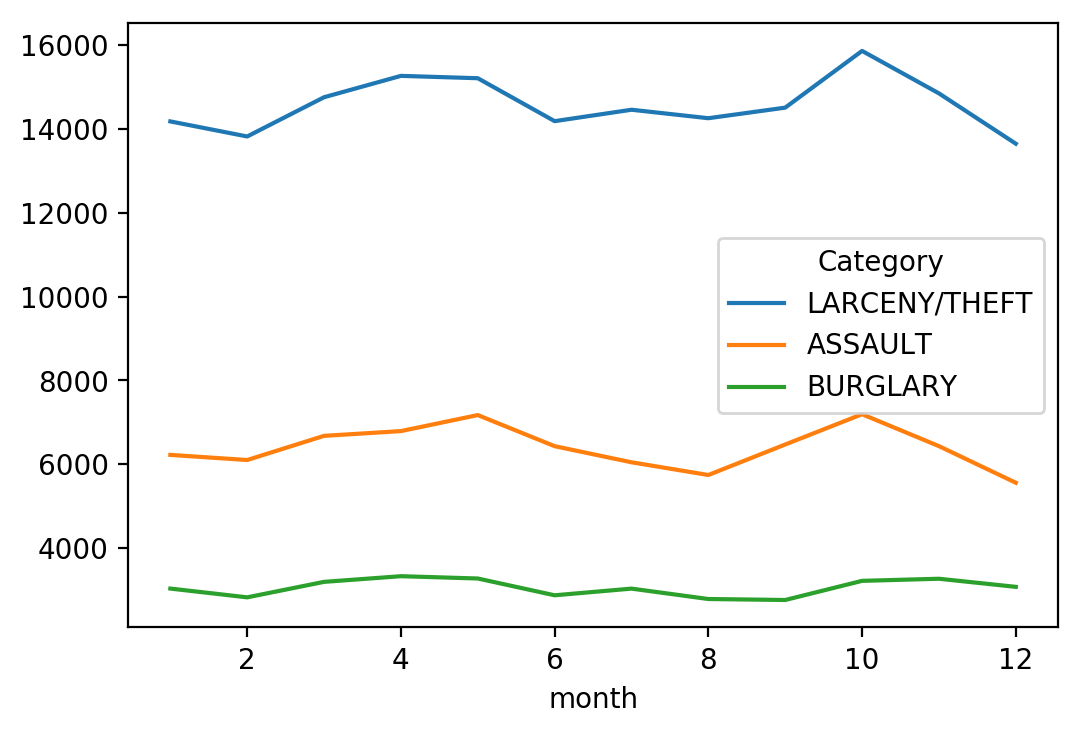

In [92]:
month_summary[['LARCENY/THEFT', 'ASSAULT', 'BURGLARY']].plot()

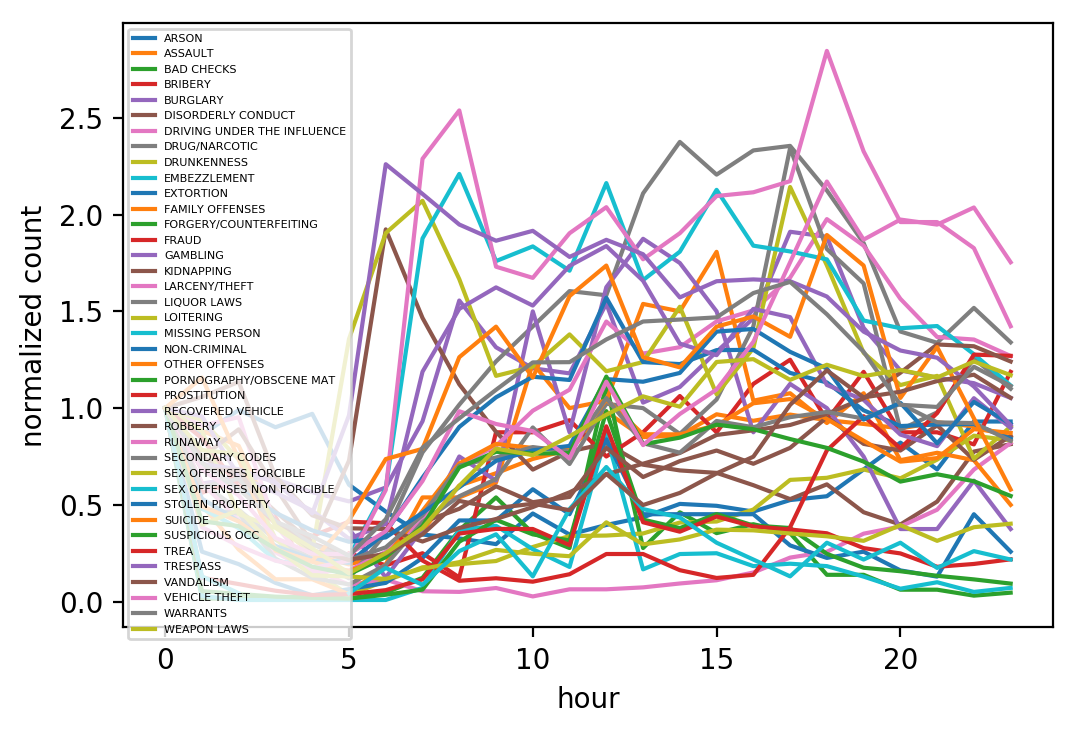

In [95]:
plt.rcParams['figure.dpi'] = 200

hour_summary = train[['Category', 'hour', 'PdDistrict']].groupby(['hour', 'Category']).count().reset_index().pivot(values='PdDistrict', 
                                                                    index='hour', columns='Category')
ax = (hour_summary/hour_summary.iloc[0]).plot()
ax.set_ylabel("normalized count")
ax.set_xlabel("hour")
ax.legend(fontsize=4)

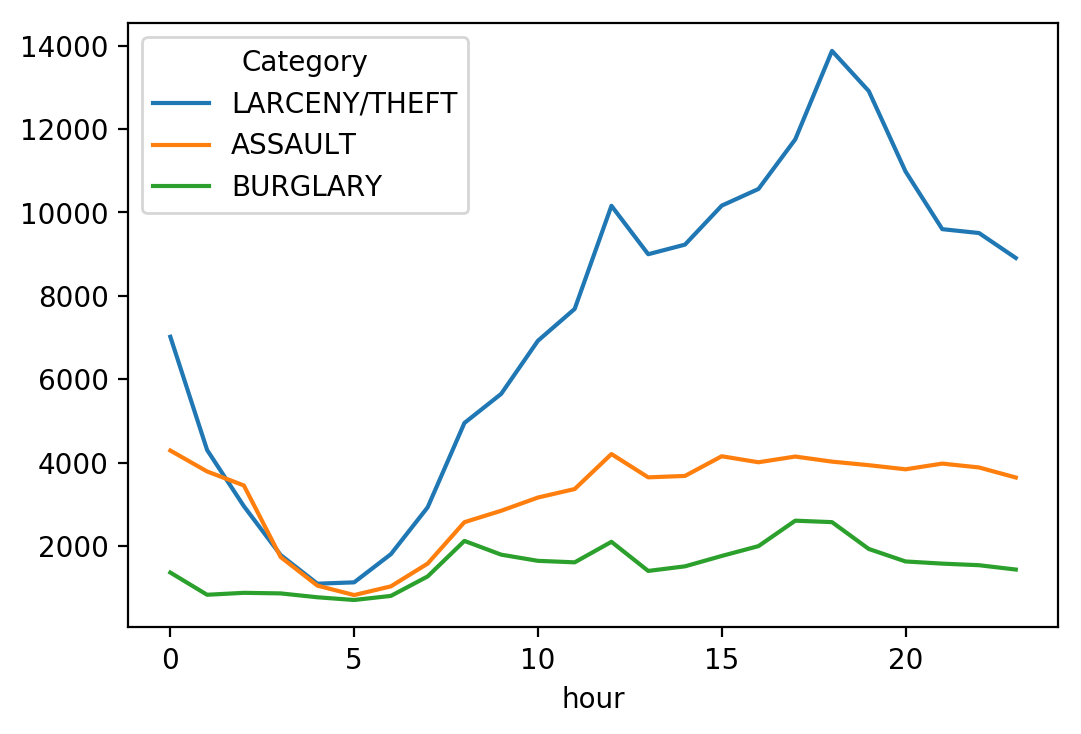

In [89]:
hour_summary[['LARCENY/THEFT', 'ASSAULT', 'BURGLARY']].plot()

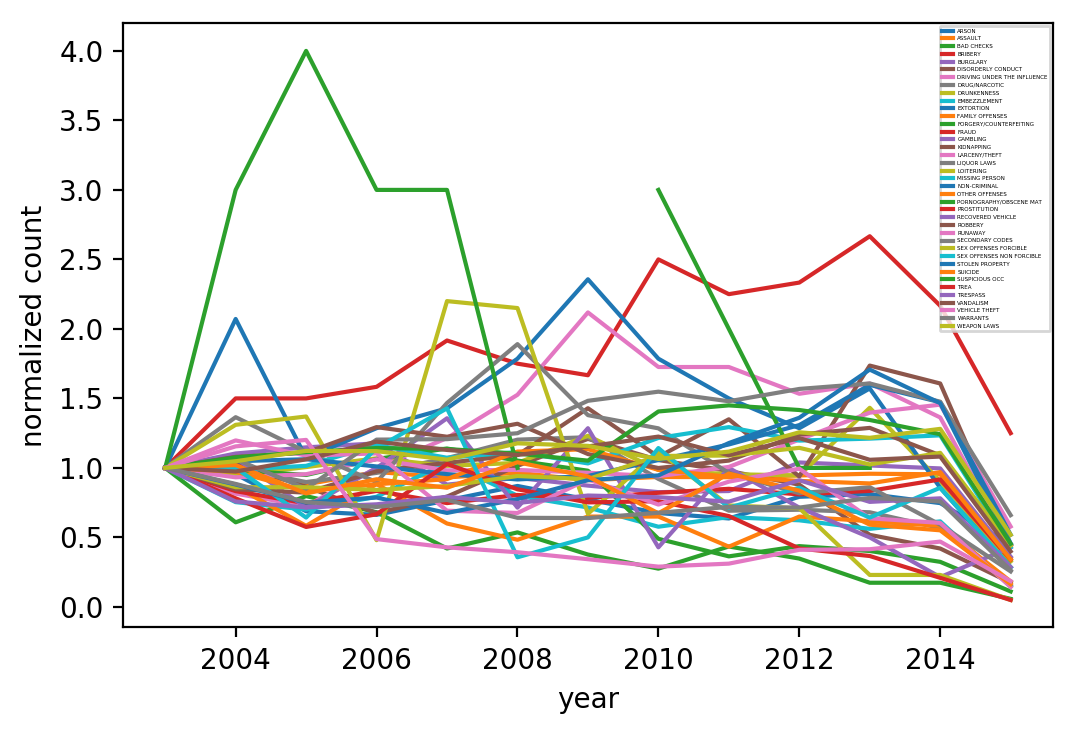

In [96]:
plt.rcParams['figure.dpi'] = 200

summary = train[['Category', 'year', 'PdDistrict']].groupby(['year', 'Category']).count().reset_index().pivot(values='PdDistrict', 
                                                                    index='year', columns='Category')
ax = (summary/summary.iloc[0]).plot()
ax.set_ylabel("normalized count")
ax.set_xlabel("year")
ax.legend(fontsize=2)

In [143]:
plt.rcParams['figure.dpi'] = 200

pd_district_count = train[['Category', 'PdDistrict']].groupby(['PdDistrict']).count()

Text(0.5,1,'Total Crime per PdDistrict')

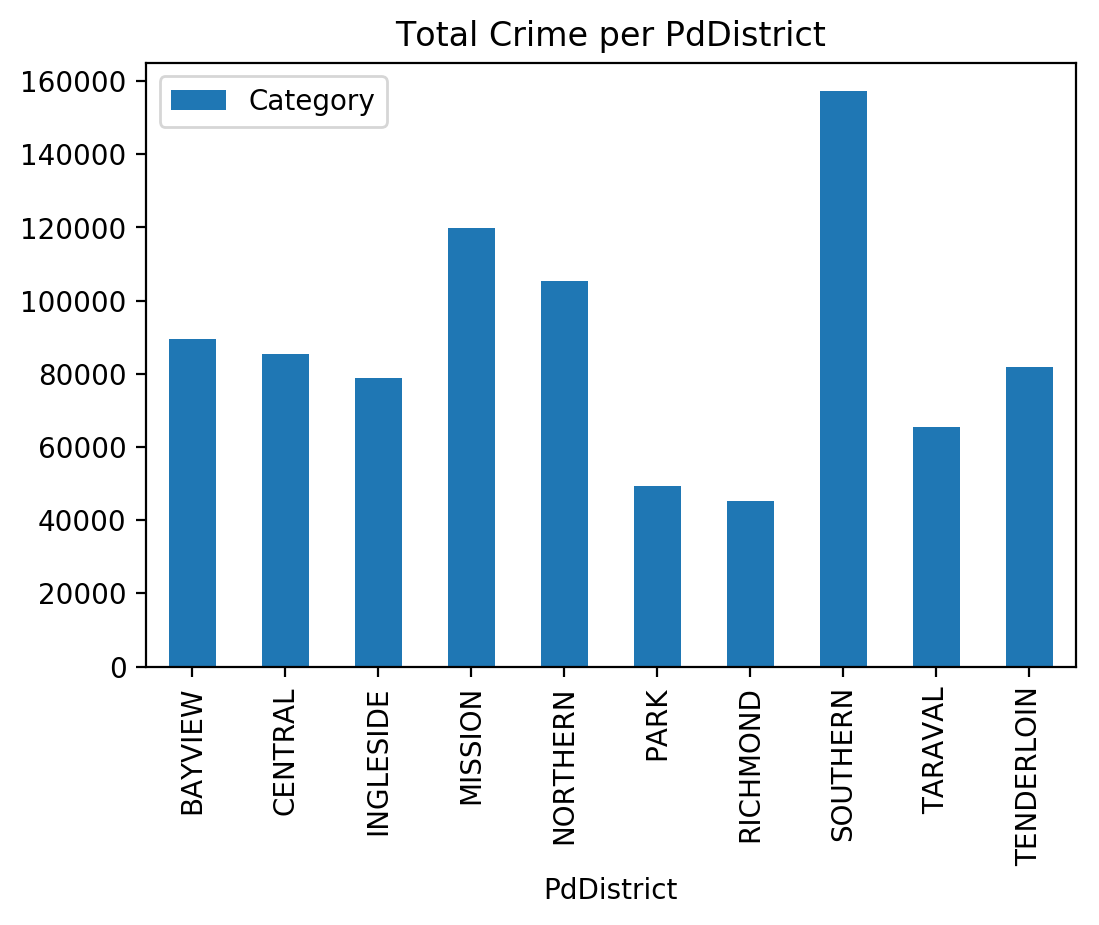

In [144]:
pd_district_count.plot.bar().set_title('Total Crime per PdDistrict')

In [126]:
sfpd_boundary = gpd.read_file(r'C:\Users\AREHAN2\Documents\omscs\kgl\sfpd_districts\SFPD_Districts.shp')

In [127]:
sfpd_boundary

,DISTRICT,COMPANY,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,SOUTHERN,B,87550.275142,100231.353916,9.134414e+07,(POLYGON ((6015057.107218072 2117190.278336495...
1,BAYVIEW,C,163013.798332,144143.480351,2.013846e+08,"POLYGON ((6017984.303440869 2106406.950243965,..."
2,MISSION,D,40152.783389,40518.834235,8.062384e+07,"POLYGON ((6009765.023973659 2108218.679805741,..."
3,NORTHERN,E,56493.858208,50608.310321,8.278169e+07,"POLYGON ((6003046.829890922 2122419.239346862,..."
4,PARK,F,46307.776968,50328.913294,8.487896e+07,"POLYGON ((6001194.888484046 2113428.373390287,..."
5,RICHMOND,G,69991.465355,75188.628361,1.379640e+08,"POLYGON ((6000763.203295708 2116478.96633321, ..."
6,INGLESIDE,H,74737.936295,74474.181164,1.935805e+08,"POLYGON ((6011068.137208343 2100639.886075914,..."
7,TARAVAL,I,75350.217521,73470.424000,2.846767e+08,"POLYGON ((5983605.238870993 2086471.242673203,..."
8,TENDERLOIN,J,12424.268969,18796.784185,1.107215e+07,"POLYGON ((6012019.59170419 2114343.133982867, ..."
9,CENTRAL,A,64025.129073,67686.522865,5.595027e+07,"POLYGON ((6005254.504738554 2121976.155543074,..."


In [157]:
plt.rcParams['figure.dpi'] =400
sfpd_boundary['coords'] = sfpd_boundary['geometry'].apply(lambda x: x.representative_point().coords[:])
sfpd_boundary['coords'] = [coords[0] for coords in sfpd_boundary['coords']]

In [150]:
#sfpd_boundary = sfpd_boundary.merge(pd_district_count.reset_index(), left_on='DISTRICT', right_on='PdDistrict')
pd_district_count = gpd.GeoDataFrame((pd_district_count.reset_index().merge(sfpd_boundary, right_on='DISTRICT', left_on='PdDistrict')))

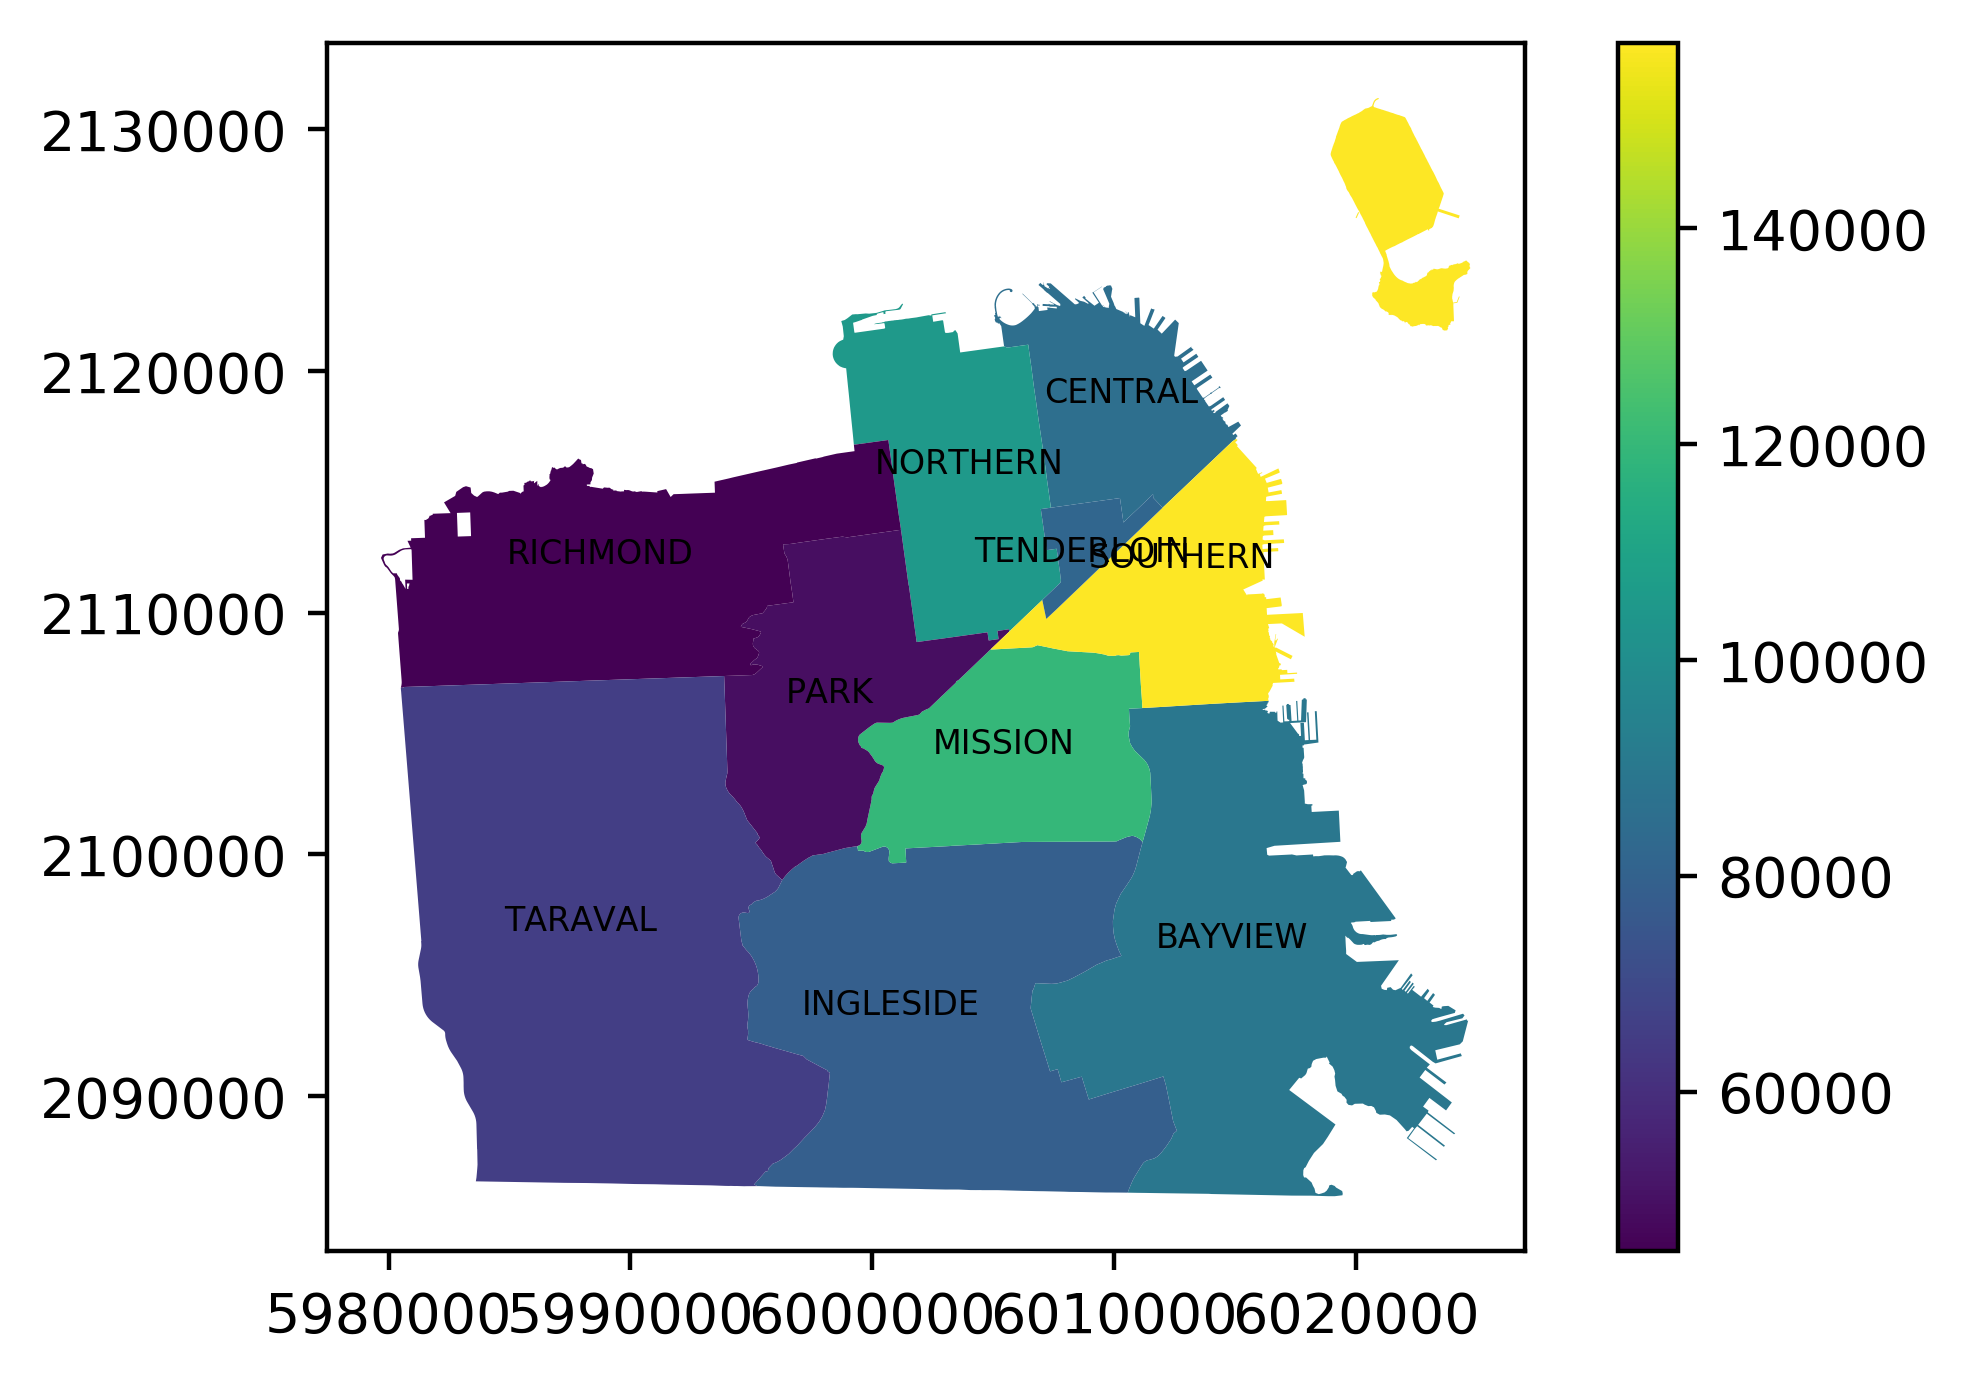

In [161]:
ax = pd_district_count.plot('Category', legend=True)

for idx, row in pd_district_count.iterrows():
    plt.annotate(s=row['PdDistrict'], xy=row['coords'],
                 horizontalalignment='center', fontsize=6)